In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('C:/Users/ozaka/Documents/VS_ML/ML/Assn7.csv') #telecom customer churn

In [3]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

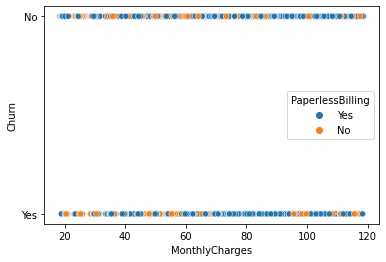

In [5]:
sns.scatterplot(data=df, x=df['MonthlyCharges'], y=df['Churn'], hue=df['PaperlessBilling'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

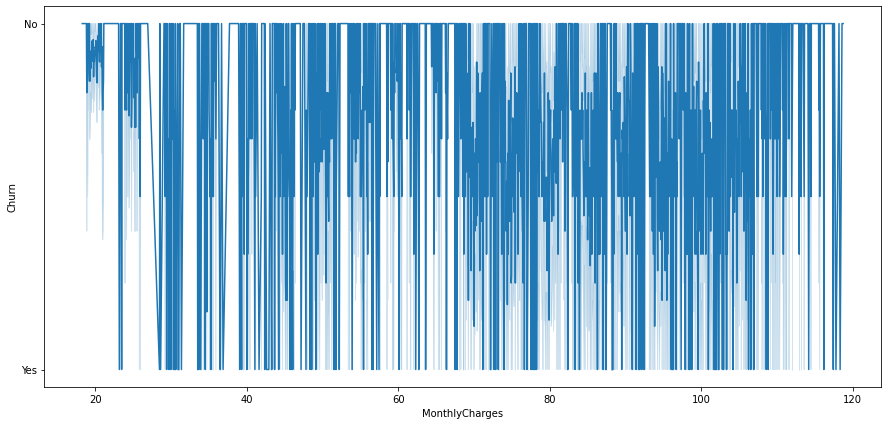

In [6]:
plt.figure(1, (15, 7))
sns.lineplot(x='MonthlyCharges', y='Churn', data=df)

<AxesSubplot:>

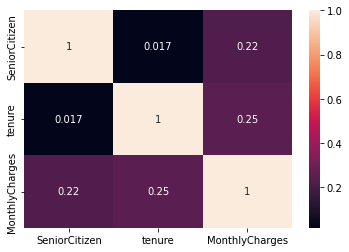

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
x_data = df.drop(['Churn','customerID','gender','Partner','Dependents',
                  'PhoneService','MultipleLines','InternetService','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                  'TotalCharges'], axis=1)
x_data.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [9]:
y_data = df.drop(columns=['customerID','gender','Partner','Dependents',
                  'PhoneService','MultipleLines','InternetService','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                  'TotalCharges','SeniorCitizen','MonthlyCharges','SeniorCitizen','tenure'], axis=1)
y_data.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=45)
pmodel = Perceptron(alpha=0.01, max_iter=20000)
pmodel.fit(X_train, y_train.values.ravel())
predvals = pmodel.predict(X_test)
score = accuracy_score(y_test, predvals)
print("The accuracy is: ", score)

The accuracy is:  0.6870120652945352
